In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
c=cast
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
rd=release_dates
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

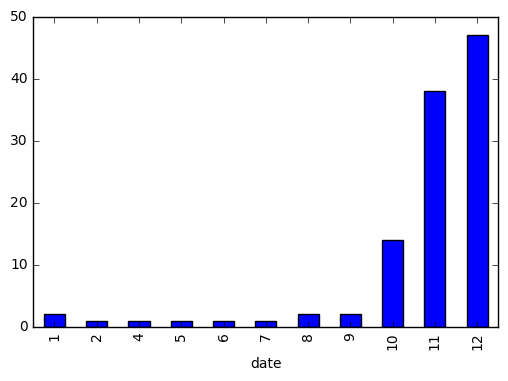

In [17]:
rd[(rd.country=='USA')&(rd.title.str.contains('Christmas'))].groupby([rd.date.dt.month]).size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

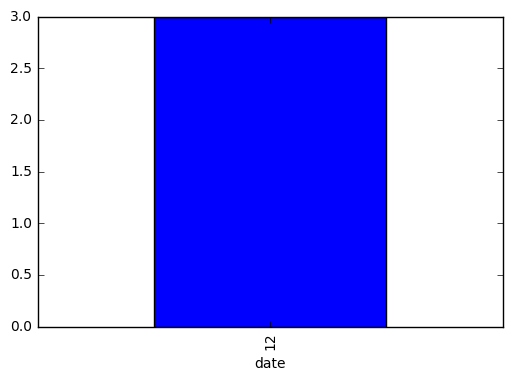

In [19]:
rd[(rd.country=='USA')&(rd.title.str.startswith('The Hobbit'))].groupby([rd.date.dt.month]).size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

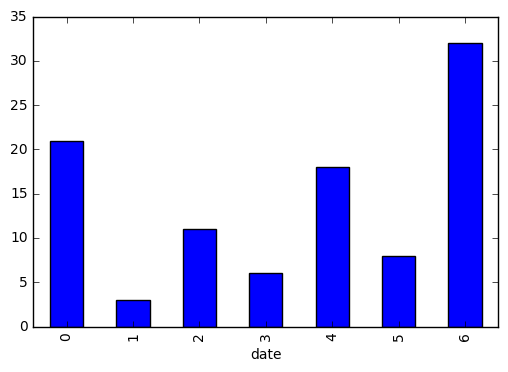

In [20]:
rd[(rd.country=='USA')&(rd.title.str.contains('Romance'))].groupby([rd.date.dt.dayofweek]).size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

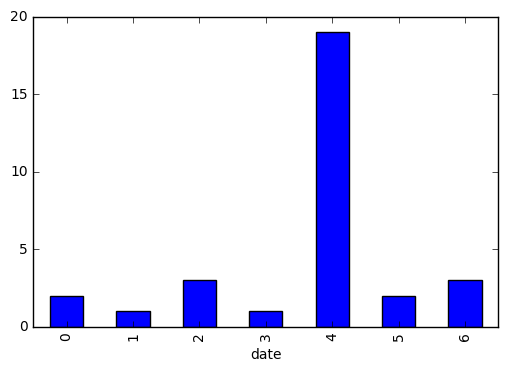

In [21]:
rd[(rd.country=='USA')&(rd.title.str.contains('Action'))].groupby([rd.date.dt.dayofweek]).size().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [33]:
tmp = c[(c.name=='Judi Dench')&(c.year//10==199)].merge(rd[rd.country=='USA']).sort('date')[['title','date']]
tmp

/Users/cwoodson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,date
0,GoldenEye,1995-11-17
2,Jack & Sarah,1996-03-22
1,Hamlet,1996-12-25
3,Mrs Brown,1997-10-03
7,Tomorrow Never Dies,1997-12-19
4,Shakespeare in Love,1999-01-08
5,Tea with Mussolini,1999-05-14
6,The World Is Not Enough,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

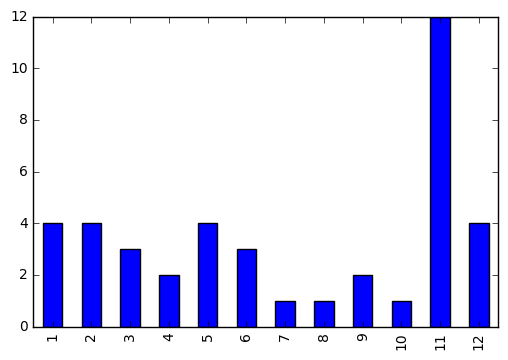

In [41]:
c[(c.name=='Judi Dench')].merge(rd[rd.country=='USA']).date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

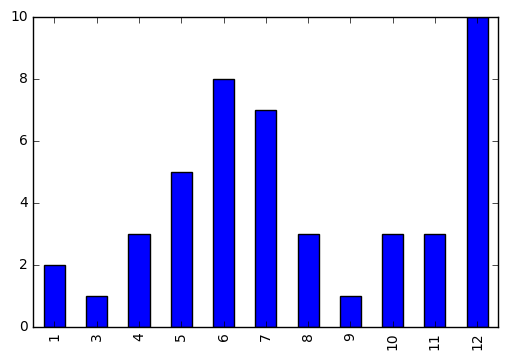

In [42]:
c[(c.name=='Tom Cruise')].merge(rd[rd.country=='USA']).date.dt.month.value_counts().sort_index().plot(kind='bar')